# Simple and Multiple Linear Regression

Linear regression is a statistical model that examines the linear relationship between two (Simple Linear Regression ) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s). Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too

Simple linear regression is an approach for predicting a response using a single feature.

It is assumed that the two variables are linearly related. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too:

<img src='image_skssk\1mlr.png'>

As you can see, a linear relationship can be positive (independent variable goes up, dependent variable goes up) or negative (independent variable goes up, dependent variable goes down). 


## Linear Regression Theory
The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y (output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

We know that the equation of a straight line is basically:

<img src='image_skssk\simple_img.png' width='400'>


The equation of the above line is :

## **`Y = mx + c`**

Where:

### **`c is the intercept`**
### **`m is the slope of the line.`**

So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept (b) and slope (m). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

<img src='image_skssk\simple1_img.gif' width='500'>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #untuk splitting data
from sklearn.linear_model import LinearRegression #untuk buat prediksi linearRegression
from sklearn import metrics #untuk mengukur performa model

%matplotlib inline

In [3]:
dataset = pd.read_csv(r'C:\Users\HP.LAPTOP-5BTBEJFV\Documents\data science\MODULE 3\melb_data.csv')

In [4]:
dataset.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
dataset.describe(exclude='number')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,53 William St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


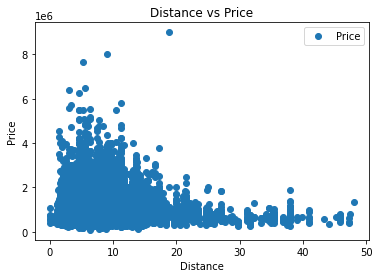

In [8]:
dataset.plot(x='Distance', y='Price', style='o')
plt.title('Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

Dari data diatas dapat diambil beberapa insight sebagai berikut:
1. Bagi korporat, khususnya yang bergerak di bidang property sebaiknya membuat property dengan distance yang tidak terlalu jauh dengan pusat bisnis. untuk bisnis selain property bisa melakukan kegiatan bisnis di radius 0-15.
2. Bagi pemerintah hendaknya mempersiapkan berbagai pusat kegiatab seperti RS dsb lebih banyak di radius 0-15

## Tahapan dalam melakukan machine learning dengan regresi :
### step 1 : Memisahkan feature independen dengan target (dependen)

In [9]:
x = dataset['Distance'].values.reshape(-1,1)
y = dataset['Price'].values.reshape(-1,1)

### Step 2 : Memisahkan data test dengan data train

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(10864, 1)

In [26]:
X_test.shape

(2716, 1)

In [27]:
Y_train.shape

(10864, 1)

In [28]:
Y_test.shape

(2716, 1)

### Step 3 : Training Model dengan Data Train

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) #training the algorithm

LinearRegression()

### mencari nilai Slope dan Intercept
> **Y = mx + c**

* Y = Variabel Dependen
* x = Variabel Independen
* m = slope
* c = intercept

> **HargaRumah = (-17477.41099535 * Distance) +1253020.23097842**

In [30]:
#untuk mendapatkan nilai intercept
print(regressor.intercept_)

#untuk mendapatkan slope
print(regressor.coef_)

[1253396.22057152]
[[-17668.57400414]]


### Contoh prediksi rumah dengan jarak 40

In [21]:
HargaRumah = (-17477.41099535 * 40) + 1253020.23097842

In [22]:
HargaRumah

553923.79116442

In [24]:
intercept = regressor.intercept_
koefisien = regressor.coef_

jarak = int(input('masukkan jarak: '))
prediksi_harga_rumah = intercept + koefisien*jarak
prediksi_harga_rumah[0][0]

masukkan jarak: 100


-494720.86855664756

### Step 4 : Membuat kolom Y predict

In [66]:
y_pred = regressor.predict(X_test)

In [27]:
Y_test.flatten()

array([2165000.,  815000.,  610000., ..., 1230000., 1270000., 1000000.])

In [25]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})

In [28]:
df

,Actual,Predicted
0,2165000.0,1.113201e+06
1,815000.0,1.137669e+06
2,610000.0,1.069507e+06
3,1245000.0,1.174372e+06
4,1160000.0,1.104462e+06
...,...,...
2711,305000.0,1.141165e+06
2712,1412000.0,1.113201e+06
2713,1230000.0,1.064264e+06
2714,1270000.0,1.144660e+06


In [30]:
sns.set_style('whitegrid')

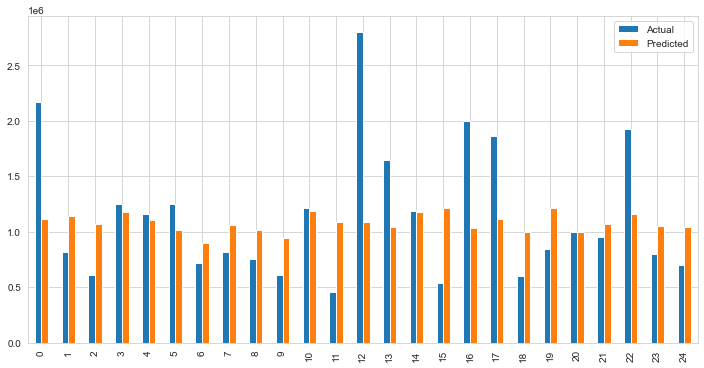

In [32]:
df1 = df.head(25)
df1.plot(kind='bar', figsize=(12,6))
plt.show()

### Step 5 : Evaluation Metrics

In [33]:
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('Max Error: ', round(metrics.max_error(Y_test, y_pred)))

Mean Absolute Error(MAE):  453479.3155352876
Mean Squared Error(MSE):  383466291875.1081
Root Mean Squared Error(RMSE):  619246.5517668291
Max Error:  5199412.0


In [34]:
print('MedAe:',
     round(metrics.median_absolute_error(Y_test, y_pred), 2))
print('MSLE:',
     round(metrics.mean_squared_log_error(Y_test, y_pred), 2))
print('RMSLE:',
     np.sqrt(metrics.mean_squared_log_error(Y_test, y_pred)))
print('R2 Score:',
     round(metrics.r2_score(Y_test, y_pred), 2))

MedAe: 366714.5
MSLE: 0.29
RMSLE: 0.5350870652451307
R2 Score: 0.03


## Multiple Linear Regression

Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression.

Simple linear regression have one dependent and one independent variable, but in multiple linear regression the dependent variable is one but there may be two or more independent variables.

The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

<img src='image_skssk\a4_img.png' width='600'>

In multple linear regression each coefficient is interpreted as the estimate change in Y corresponds to one unit change in a variable, when other variables held constant.

Linear regression is used to predict prices, weather, stock prices, quality of items, sales, etc. It is a model useful for finding the correlation between the two factors, independent variables(used to make predictions) and the dependent variable(the values to be predicted).


<img src='image_skssk\b4_img.png' align='left' width='500'>

In [35]:
dataset = pd.read_csv(r'C:\Users\HP.LAPTOP-5BTBEJFV\Documents\data science\MODULE 3\Admission_Predict.csv')

In [36]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Data Description
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [38]:
dataset = dataset.drop(['Serial No.'], axis=1)

In [39]:
dataset.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [40]:
dataset.shape

(400, 8)

### Descriptive Analysis

In [41]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


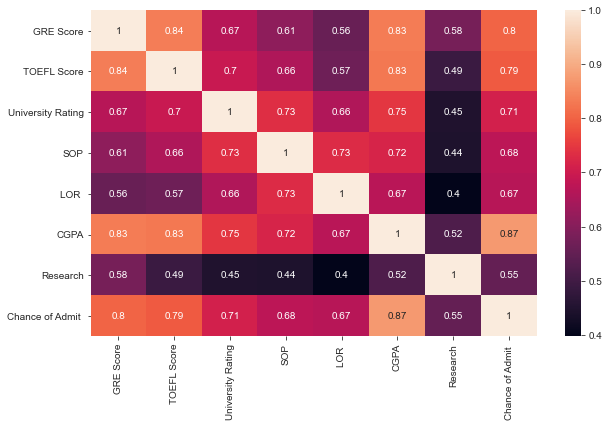

In [42]:
corr_data = dataset.corr()
plt.figure(figsize=(10,6))
sns.set_style('ticks')

sns.heatmap(corr_data,annot=True)
plt.show()

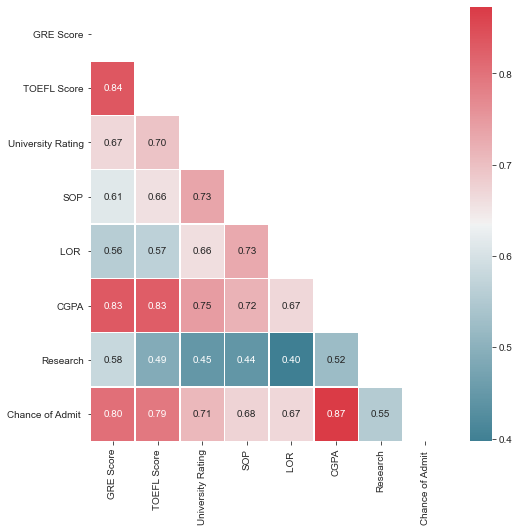

In [34]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize= (8,8))
colormap = sns.diverging_palette(220,10, as_cmap = True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap = colormap, linewidths = 0.5, annot=True, fmt = ".2f", mask = dropSelf)
plt.show()

C:\Users\HP.LAPTOP-5BTBEJFV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

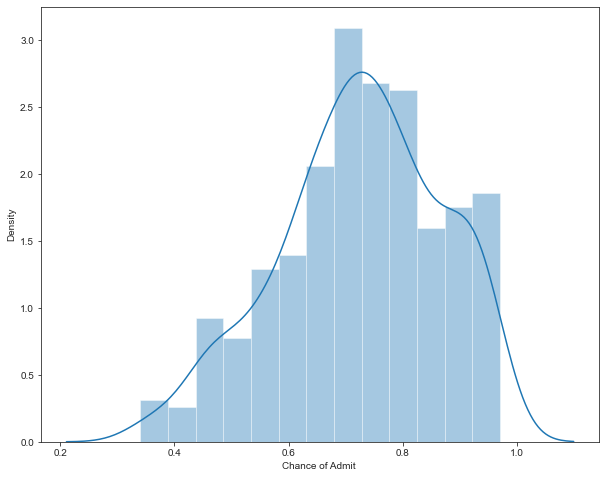

In [44]:
plt.figure(figsize=(10,8))
plt.tight_layout()
sns.distplot(dataset['Chance of Admit '])

In [43]:
X = dataset[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y = dataset[['Chance of Admit ']].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
#Training Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
regressor.coef_[0]

array([ 0.00207128,  0.00195523,  0.00657193, -0.00472847,  0.02118445,
        0.12463177,  0.02414366])

In [49]:
X_columns = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns

coeff_df = pd.DataFrame(regressor.coef_[0], X_columns, columns=['Coefficient/Slope'])  
coeff_df

,Coefficient/Slope
GRE Score,0.002071
TOEFL Score,0.001955
University Rating,0.006572
SOP,-0.004728
LOR,0.021184
CGPA,0.124632
Research,0.024144


In [42]:
regressor.intercept_[0]

-1.3047138300824122

In [50]:
y_pred = regressor.predict(X_test)

In [51]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(25)

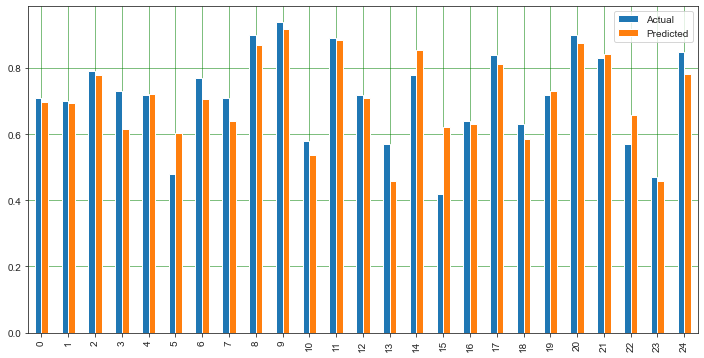

In [54]:
df1.plot(kind='bar',figsize=(12, 6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [55]:
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', round(metrics.r2_score(y_test, y_pred), 2))

Mean Absolute Error(MAE):  0.050087548438179565
Mean Squared Error(MSE):  0.004805156569785203
Root Mean Squared Error(RMSE):  0.0693192366503354
R2 Score: 0.74


In [56]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mean_target = dataset['Chance of Admit '].mean()

print('Percentage of Error by RMSE:', round(RMSE / mean_target * 100, 2), '%')
print('Percentage of Error by MAE:', round(MAE / mean_target * 100, 2), '%')

Percentage of Error by RMSE: 9.57 %
Percentage of Error by MAE: 6.91 %



## Reference
- Nagesh Singh Chauhan, "A beginner’s guide to Linear Regression in Python with Scikit-Learn", https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
- Dataset source: https://www.kaggle.com/mohansacharya/graduate-admissions/data
- Manja Bogicevic, "Multiple Linear Regression Using Python", https://medium.com/@manjabogicevic/multiple-linear-regression-using-python-b99754591ac0
- Arnav Oberoi, "Multiple Linear Regression-Beginner’s Guide", https://towardsdatascience.com/multiple-linear-regression-beginners-guide-5b602d716aa3
- Abin Joy, "Multiple Linear Regression with Python", https://medium.com/analytics-vidhya/multiple-linear-regression-with-python-98f4a7f1c26c
- Jeff Macaluso, "Testing Linear Regression Assumptions in Python ", https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
- Data to Fish, "Linear Regression in Python using Statsmodels", https://datatofish.com/statsmodels-linear-regression/
- Jeff Macaluso, "Testing Linear Regression Assumptions in Python", https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/